In [1]:
#All required libraries are imported here for you.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
# Load the dataset
blood = pd.read_csv('blood.csv')
blood = blood.rename(columns={'Recency (months)': 'months since last donation',
                              'Frequency (times)': 'total number of donations', 
                              'Monetary (c.c. blood)': 'total blood donated (in c.c.)',
                             'Time (months)': 'months since first donation', 
                              'whether he/she donated blood in March 2007': 'Donated'})

In [3]:
# Create the log dataframe
log_blood = blood.copy()

# Fix values <= 0 by replacing them with NaN
log_blood['months since last donation'] = log_blood['months since last donation'].apply(lambda x: np.nan if x <= 0 else x)
log_blood['total number of donations'] = log_blood['total number of donations'].apply(lambda x: np.nan if x <= 0 else x)
log_blood['total blood donated (in c.c.)'] = log_blood['total blood donated (in c.c.)'].apply(lambda x: np.nan if x <= 0 else x)
log_blood['months since first donation'] = log_blood['months since first donation'].apply(lambda x: np.nan if x <= 0 else x)

# Take the logarithm of the fixed values
log_blood['months since last donation'] = np.log10(log_blood['months since last donation'])
log_blood['total number of donations'] = np.log10(log_blood['total number of donations'])
log_blood['total blood donated (in c.c.)'] = np.log10(log_blood['total blood donated (in c.c.)'])
log_blood['months since first donation'] = np.log10(log_blood['months since first donation'])

# Fix values NaN by replacing them with 0
log_blood['months since last donation'] = log_blood['months since last donation'].fillna(0)
log_blood['total number of donations'] = log_blood['total number of donations'].fillna(0)
log_blood['total blood donated (in c.c.)'] = log_blood['total blood donated (in c.c.)'].fillna(0)
log_blood['months since first donation'] = log_blood['months since first donation'].fillna(0)

In [4]:
# Features
X = log_blood[['months since last donation', 'total number of donations', 
           'total blood donated (in c.c.)', 'months since first donation']]
features = ['months since last donation', 'total number of donations', 
           'total blood donated (in c.c.)', 'months since first donation']

# Labels
y = log_blood['Donated']

In [5]:
np.random.seed(123)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.33)

print('Training:', X_train.shape)
print('Validating:', X_valid.shape)
print('Testing:', X_test.shape)

# Initialize the model
model = GaussianNB()

# Fit the model
model.fit(X_train[features], y_train)

# Predict on train data
y_pred_train = model.predict(X_train[features])

# Predict on validating data
y_pred_valid = model.predict(X_valid[features])

# Predict on test data
y_pred_test = model.predict(X_test[features])

Training: (523, 4)
Validating: (150, 4)
Testing: (75, 4)


In [6]:
# Creating a confusion matrix for the training data
train_tn, train_fp, train_fn, train_tp = confusion_matrix(y_train, y_pred_train).ravel()
train_cm = confusion_matrix(y_train, y_pred_train)

# Creating a confusion matrix for the validating data
valid_tn, valid_fp, valid_fn, valid_tp = confusion_matrix(y_valid, y_pred_valid).ravel()
valid_cm = confusion_matrix(y_valid, y_pred_valid)

# Creating a confusion matrix for the test data
test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_pred_test).ravel()
test_cm = confusion_matrix(y_test, y_pred_test)

In [7]:
# Evaluate the model on training data
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = metrics.recall_score(y_train, y_pred_train)
train_specificity = train_tn / (train_tn + train_fp)
train_f1 = metrics.f1_score(y_train, y_pred_train)

# Evaluate the model on valdiating data
valid_accuracy = metrics.accuracy_score(y_valid, y_pred_valid)
valid_precision = precision_score(y_valid, y_pred_valid)
valid_recall = metrics.recall_score(y_valid, y_pred_valid)
valid_specificity = valid_tn / (valid_tn + valid_fp)
valid_f1 = metrics.f1_score(y_valid, y_pred_valid)

# Evaluate the model on testing data
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = metrics.recall_score(y_test, y_pred_test)
test_specificity = test_tn / (test_tn + test_fp)
test_f1 = metrics.f1_score(y_test, y_pred_test)

In [8]:
# Printing test evaluation metrics
print('---Training Performance---')
print('Training Accuracy:', train_accuracy)
print('Training Precision Score:', train_precision)
print('Training Recall Score:', train_recall)
print('Training Specificity Score:', train_specificity)
print('Training F1 Score:', train_f1)

# Printing validation evaluation metrics
print('---Valdiating Performance---')
print('Valid Accuracy:', valid_accuracy)
print('Valid Precision Score:', valid_precision)
print('Valid Recall Score:', valid_recall)
print('Valid Specificity Score:', valid_specificity)
print('Valid F1 Score:', valid_f1)

---Training Performance---
Training Accuracy: 0.780114722753346
Training Precision Score: 0.5180722891566265
Training Recall Score: 0.3644067796610169
Training Specificity Score: 0.9012345679012346
Training F1 Score: 0.42786069651741293
---Valdiating Performance---
Valid Accuracy: 0.8
Valid Precision Score: 0.7
Valid Recall Score: 0.3684210526315789
Valid Specificity Score: 0.9464285714285714
Valid F1 Score: 0.4827586206896552


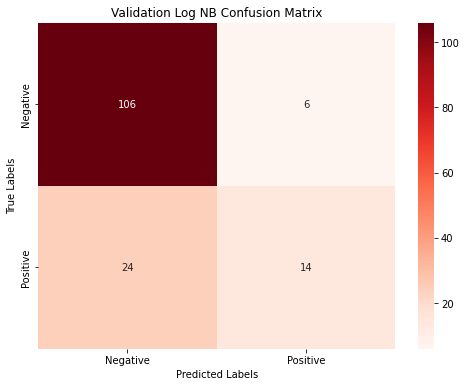

In [9]:
# Plot validating data using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(valid_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Validation Log NB Confusion Matrix')
plt.show()

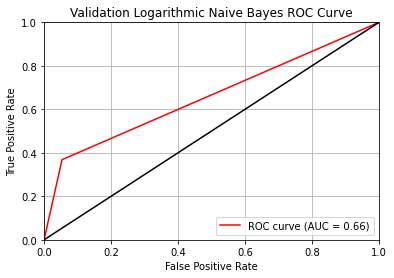

In [10]:
# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_valid)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'red', label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'black')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Logarithmic Naive Bayes ROC Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

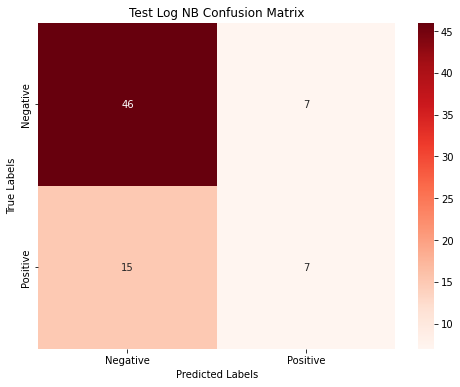

In [11]:
# Plot testing data using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Log NB Confusion Matrix')
plt.show()

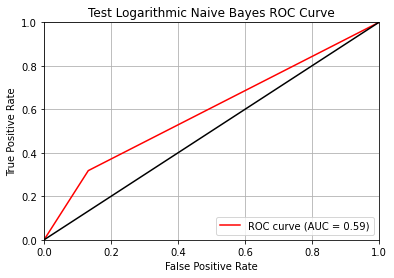

In [12]:
# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'red', label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'black')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Logarithmic Naive Bayes ROC Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()